In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project(WOC)/polynomial_train.csv" )
X_train = np.array(df.iloc[0:45000,1:4],dtype = 'float64')
Y_train = np.array(df.iloc[0:45000,4:5],dtype = 'float64')
X_CVS = np.array(df.iloc[45000:50000,1:4],dtype = 'float64')
Y_CVS = np.array(df.iloc[45000:50000,4:5],dtype = 'float64')

In [ ]:
X_train.shape

(45000, 3)

In [ ]:
J = []
iterations = []

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Project(WOC)/polynomial_test_data.csv" )
X_test = np.array(df1.iloc[0:20000,1:4])

In [ ]:
class Polynomial_Regression:
  def __init__(self,X,Y,highest_degree,learning_rate,epoches,lamda):
    # We will have a polynomial with highest degree as degree in each feature in the model
    self.degree = highest_degree
    X_transform = self.transform(X)
    self.w = np.zeros((1,X_transform.shape[1]))
    self.b = random.randint(0,100)
    self.Train(X_transform,Y,learning_rate,epoches,lamda)
  def Normalization(self,X):
        #z-score normalization
      self.mu = np.mean(X,axis = 0)
      self.sigma= np.std(X,axis =0)
      X_norm = (X-self.mu)/self.sigma
      return X_norm
  def transform(self,X):
    '''Changes X into a X with having all the general terms of any degree less than self.degree'''
    a = X.copy()
    b = X.copy()
    c = X.copy()
    b = np.roll(b,1,axis =1)
    c = np.roll(c,2,axis = 1)
    for i in range(0,self.degree+1):
      for j in range(0,self.degree+1-i):
        for k in range(0,self.degree+1-i-j):
          if (i+j+k==0) or (i+j+k ==1):
            continue
          X = np.append(X,(a**i)*(b**j)*(c**k),axis =1)
    return X
  def Train(self,X,Y,learning_rate,epoches,lamda):
    X_norm = self.Normalization(X)
    self.Gradientdescent(X_norm,Y,learning_rate,epoches,lamda)
  def gradient(self,X,Y,lamda):
    m = X.shape[0]#number of training examples 
    n = X.shape[1]#number of features 
    dj_dw = np.zeros((1,n))
    dj_db = 0
    dj_db = np.sum((np.dot(self.w,X.transpose()) + self.b - Y.reshape(1,-1)),axis =1)
    dj_db /= m
    dj_dw = np.dot((np.dot(self.w,X.transpose())+self.b-Y.reshape(1,-1)),X) + 2*lamda*(self.w)
    dj_dw /= m
    return dj_dw,dj_db
  def Gradientdescent(self,X,Y,learning_rate,epoches,lamda):
    for j in range (0,epoches):
      C = self.cost_function(X,Y,lamda)
      if j%50==0:
         print(f"Cost function at {j} th iteration is :-  {C}")
         J.append(C)
         iterations.append(j)
      dj_dw,dj_db = self.gradient(X,Y,lamda)
      self.w -=(learning_rate)*(dj_dw)
      self.b -=  (learning_rate)*(dj_db)
      C_1 = self.cost_function(X,Y,lamda)
  def cost_function(self,X,Y,lamda):
    z = (np.dot(self.w,X.transpose())).reshape(1,X.shape[0]) 
    z -= Y.reshape(1,-1)
    z += self.b
    z = z**2
    z /= 2*X.shape[0]
    t = (self.w)**2
    t = t*lamda
    t /= X.shape[0]
    return np.sum(z,axis = 1) + np.sum(t,axis = 1)
  def evaluate(self,X_data):
    X_data = self.transform(X_data)
    X_data= (X_data-self.mu)/self.sigma
    Y= (np.dot(self.w,X_data.transpose()) + self.b)
    return Y
  def CVS(self,X_check,Y_check):
    Y_pred = self.evaluate(X_check)
    return (1 - (np.sum((Y_check.reshape(1,-1) - Y_pred)**2,axis = 1))/(np.sum((Y_check.reshape(1,-1) - np.mean(Y_check.reshape(1,-1),axis = 1))**2,axis = 1)))*100 

In [ ]:
Poly_model = Polynomial_Regression(X_train,Y_train,5,0.05,25000,0.1)

Cost function at 0 th iteration is :-  [3.17126636e+12]
Cost function at 50 th iteration is :-  [3.1336817e+10]
Cost function at 100 th iteration is :-  [1.0496326e+10]
Cost function at 150 th iteration is :-  [5.02825156e+09]
Cost function at 200 th iteration is :-  [2.6944039e+09]
Cost function at 250 th iteration is :-  [1.54548111e+09]
Cost function at 300 th iteration is :-  [9.42288845e+08]
Cost function at 350 th iteration is :-  [6.07542424e+08]
Cost function at 400 th iteration is :-  [4.11135365e+08]
Cost function at 450 th iteration is :-  [2.89512146e+08]
Cost function at 500 th iteration is :-  [2.10424501e+08]
Cost function at 550 th iteration is :-  [1.5681014e+08]
Cost function at 600 th iteration is :-  [1.19217444e+08]
Cost function at 650 th iteration is :-  [92151959.62452686]
Cost function at 700 th iteration is :-  [72262984.22207272]
Cost function at 750 th iteration is :-  [57413769.55322239]
Cost function at 800 th iteration is :-  [46187095.17651211]
Cost func

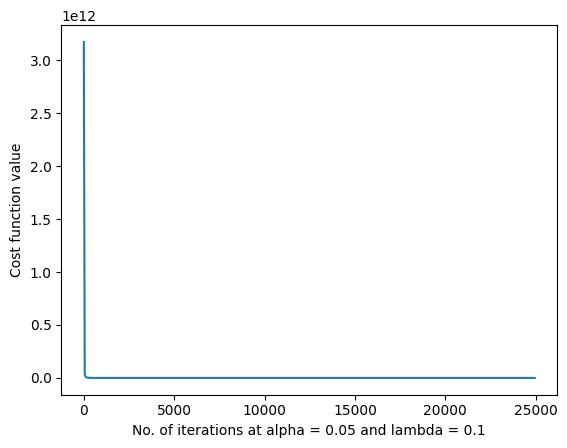

In [ ]:
plt.xlabel("No. of iterations at alpha = 0.05 and lambda = 0.1")
plt.ylabel("Cost function value")
plt.plot(iterations,J)
plt.show()

Text(0.5, 0, 'Value with learning rate = 0.05 and lambda = 0.1 ')

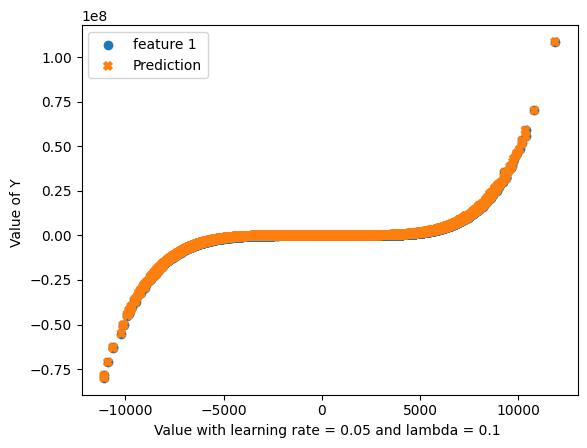

In [ ]:
plt.scatter(X_train.transpose()[0],Y_train,label= "feature 1")
plt.scatter(X_train.transpose()[0],Poly_model.evaluate(X_train),ls = '',marker = 'X',label = "Prediction")
plt.legend()
plt.ylabel("Value of Y ")
plt.xlabel("Value with learning rate = 0.05 and lambda = 0.1 ")

In [ ]:
print(Poly_model.CVS(X_CVS,Y_CVS))

[100.]


In [ ]:
output = Poly_model.evaluate(X_test)

In [ ]:
df1["output label"]=output.transpose()
a = np.array(df1.columns)
df2 = df1.drop(a[1:-1],axis = 1 )
df2
df2.to_csv('/content/drive/MyDrive/Project(WOC)/Polynomial_regression_output(1).csv')